Part 1

In [165]:
#1
import pandas as pd
data = pd.read_csv("/Users/ethanschultz/Downloads/insurance_costs_1.csv")
data.head()
#data.describe()

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,33,male,22.705,no,northwest,21984.47061
2,32,male,28.880,no,northwest,3866.85520
3,31,female,25.740,no,southeast,3756.62160
4,60,female,25.840,no,northwest,28923.13692


In [170]:
#2
# make some dummy variables where appropriate
data2 = pd.get_dummies(data, columns=["sex", "smoker"], drop_first=True)
data2

,age,bmi,region,charges,sex_male,smoker_yes
0,19,27.900,southwest,16884.92400,False,True
1,33,22.705,northwest,21984.47061,True,False
2,32,28.880,northwest,3866.85520,True,False
3,31,25.740,southeast,3756.62160,False,False
4,60,25.840,northwest,28923.13692,False,False
...,...,...,...,...,...,...
426,23,33.400,southwest,10795.93733,False,False
427,18,31.920,northeast,2205.98080,False,False
428,18,36.850,southeast,1629.83350,False,False
429,21,25.800,southwest,2007.94500,False,False


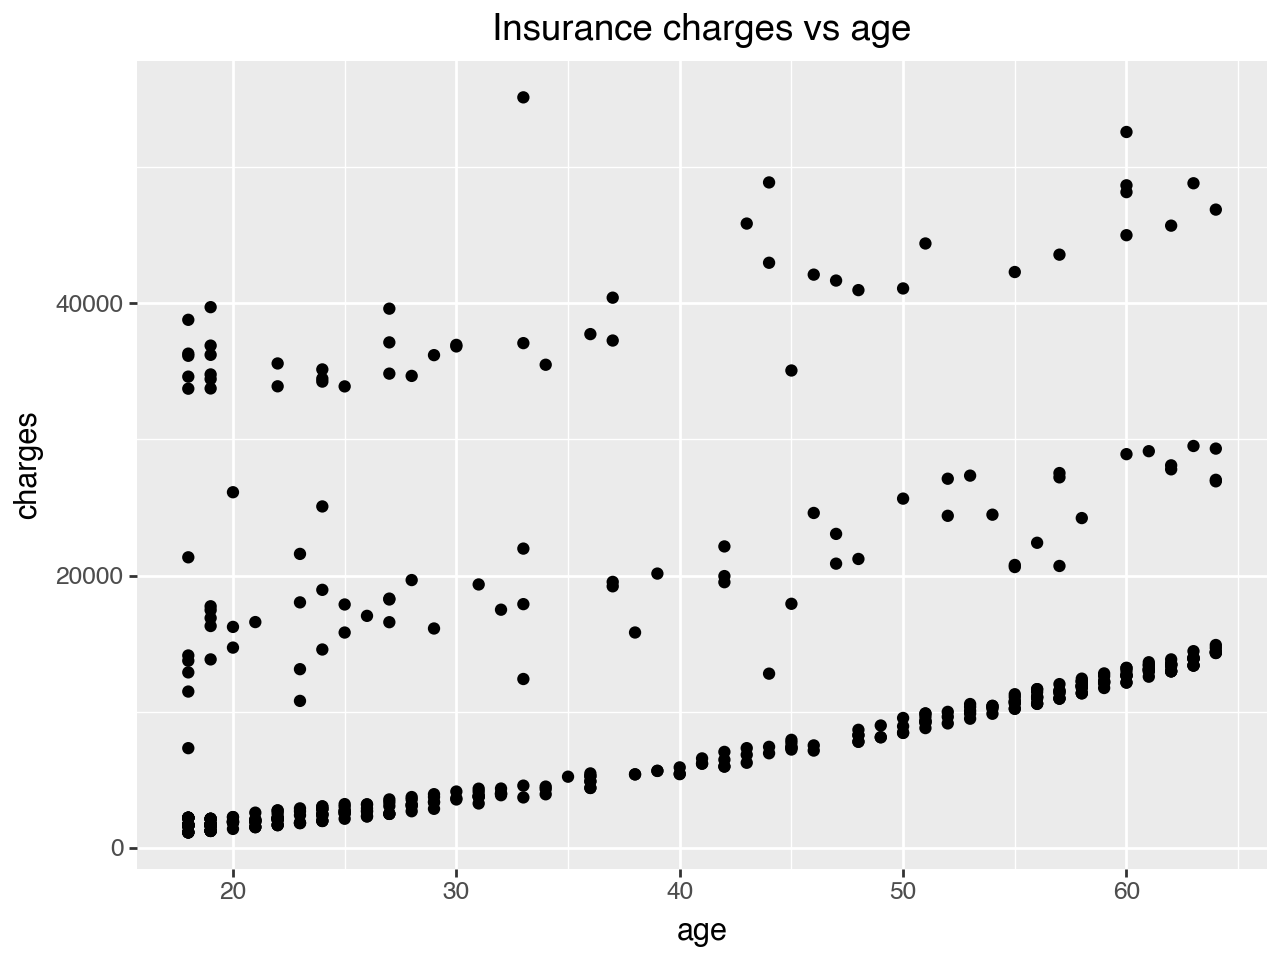

In [171]:
#3
import plotnine
from plotnine import *
(ggplot(data2, aes(x="age", y="charges")) +
 geom_point() +
labs(title = "Insurance charges vs age")
)

We see that there is a linear positive relationship between charges and age suggesting that as someone gets older their insurance charges get greater which makes sense because older people are more risk prone with health issues.

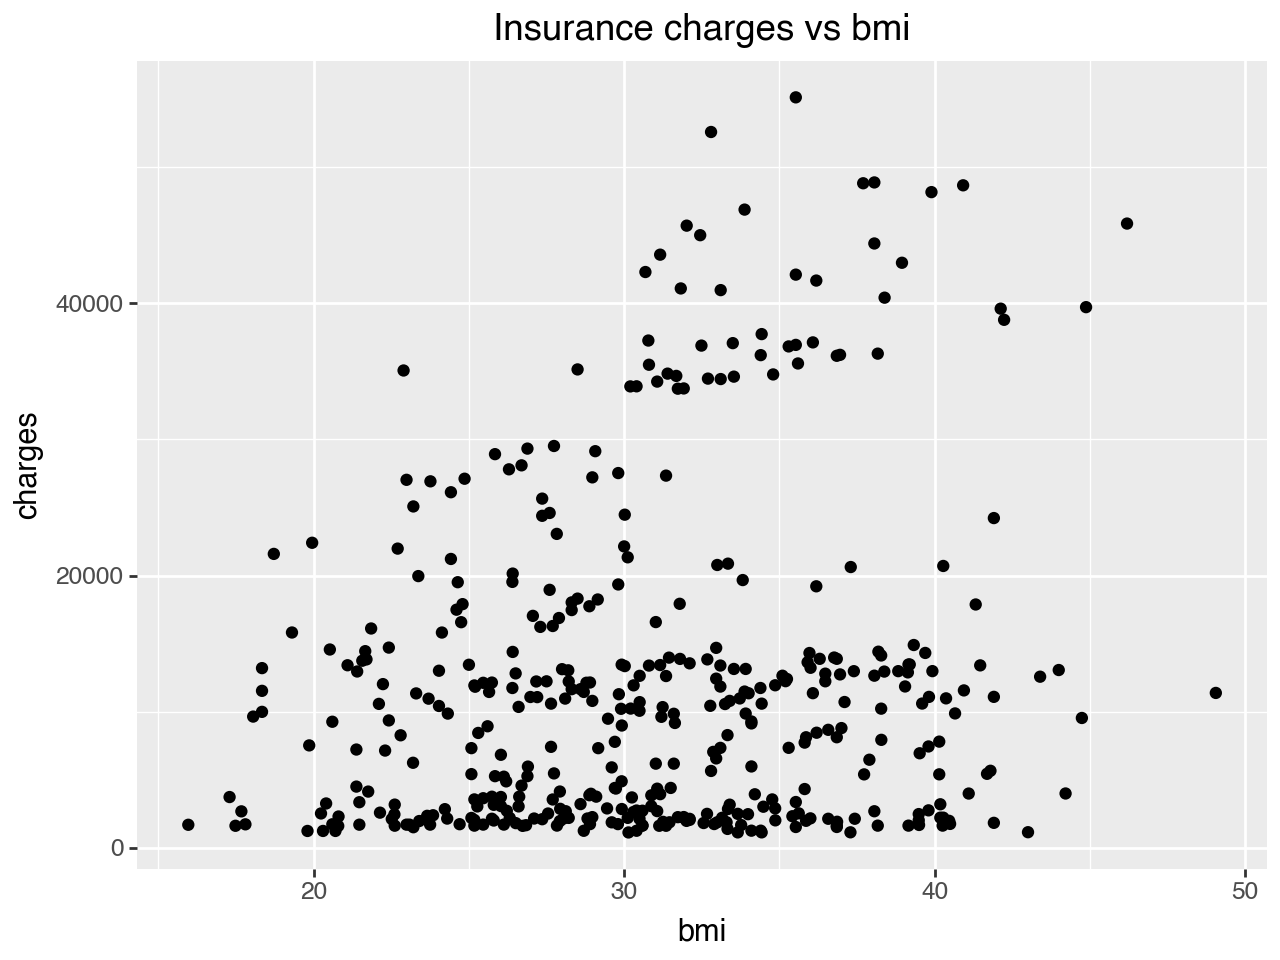

In [172]:
(ggplot(data2, aes(x="bmi", y="charges")) +
 geom_point() +
labs(title = "Insurance charges vs bmi")
)

In this plot we see a slight positive linear trend with bmi and insurance charges. People with higher bmi tend to have higher insurance costs, insurance companies might see them as generally being overwight and more prone to health risks.

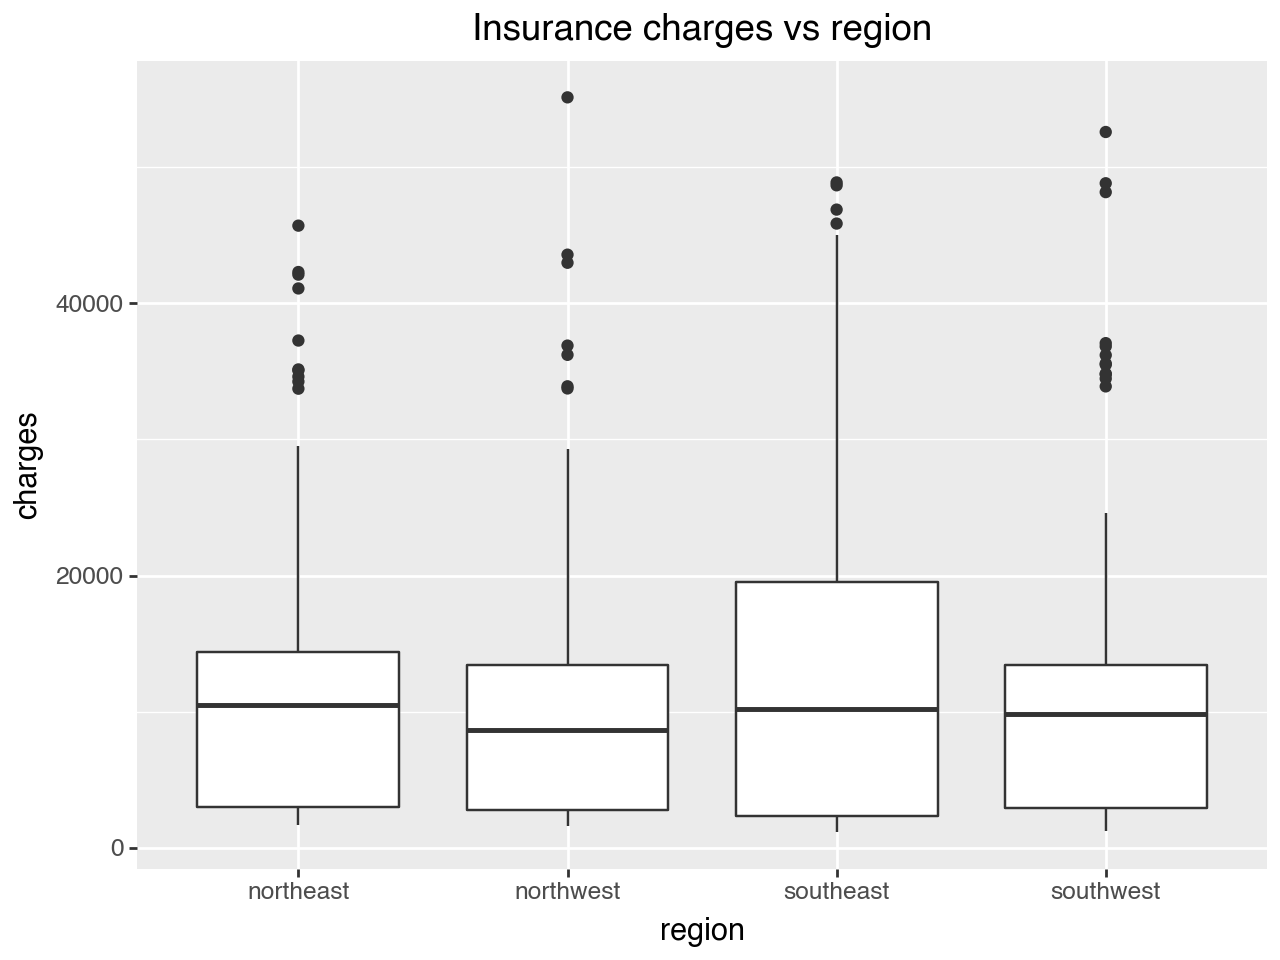

In [173]:
(ggplot(data2, aes(x="region", y="charges")) +
 geom_boxplot() +
labs(title = "Insurance charges vs region")
)

From the box plot of the four regions and the insurance costs associated with them there is no clear trend or difference between the regions that can be seen from the plot.

Part 2

In [174]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [175]:
X = data.drop("charges", axis = 1)
y = data["charges"]



X_train, X_test, y_train, y_test = train_test_split(X, y)

In [176]:
#1
ct = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age"])
  ],
  remainder = "drop"
)


lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

lr_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('standardize',
                                                  StandardScaler(),
                                                  ['age'])])),
                ('linear_regression', LinearRegression())])

In [177]:
lr_fitted = lr_pipeline.fit(X_train, y_train)
train_pred = lr_fitted.predict(X_train)
test_pred = lr_fitted.predict(X_test)
test_mse = mean_squared_error(y_test, test_pred)
test_r2 = r2_score(y_test, test_pred)
intercept = lr_fitted.named_steps['linear_regression'].intercept_
coefficient = lr_fitted.named_steps['linear_regression'].coef_

# printing results
print("Test MSE:", test_mse)
print("Test R^2:", test_r2)
print("intercept:", intercept)
print("coefficients:", coefficient)

Test MSE: 117387161.29963559
Test R^2: 0.1575929871487557
intercept: 12578.899469563466
coefficients: [3241.58946181]
Test MSE: 117387161.29963559
Test R^2: 0.1575929871487557
intercept: 12578.899469563466
coefficients: [3241.58946181]


The R^2 = 0.15 which means that 15% of insurance charges is explained by age, which is not that great. The intercept of 12578 means that for a person of age 0 the insurance cost on average is $12,578 and the slope of 3241 means that for every year a person ages their insurance charges go up by $3241

In [178]:
#2
ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["sex"]),
    ("standardize", StandardScaler(), ["age"])
  ],
  remainder = "drop"
)


lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

lr_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('dummify',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['sex']),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  ['age'])])),
                ('linear_regression', LinearRegression())])

In [179]:
lr_fitted = lr_pipeline.fit(X_train, y_train)
train_pred = lr_fitted.predict(X_train)
test_pred = lr_fitted.predict(X_test)
test_mse = mean_squared_error(y_test, test_pred)
test_r2 = r2_score(y_test, test_pred)
intercept = lr_fitted.named_steps['linear_regression'].intercept_
coefficient = lr_fitted.named_steps['linear_regression'].coef_

# printing results
print("Test MSE:", test_mse)
print("Test R^2:", test_r2)
print("intercept:", intercept)
print("coefficients:", coefficient)

Test MSE: 116591339.21543333
Test R^2: 0.16330405552532734
intercept: -9.265275847362108e+17
coefficients: [9.26527585e+17 9.26527585e+17 3.24760778e+03]
Test MSE: 116591339.21543333
Test R^2: 0.16330405552532734
intercept: -9.265275847362108e+17
coefficients: [9.26527585e+17 9.26527585e+17 3.24760778e+03]


The R^2 = 0.163 which is higher than the first model indicating that this model is better.

In [182]:
#3
ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["smoker"]),
    ("standardize", StandardScaler(), ["age"])
  ],
  remainder = "drop"
)


lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

lr_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('dummify',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['smoker']),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  ['age'])])),
                ('linear_regression', LinearRegression())])

In [183]:
lr_fitted = lr_pipeline.fit(X_train, y_train)
train_pred = lr_fitted.predict(X_train)
test_pred = lr_fitted.predict(X_test)
test_mse = mean_squared_error(y_test, test_pred)
test_r2 = r2_score(y_test, test_pred)
intercept = lr_fitted.named_steps['linear_regression'].intercept_
coefficient = lr_fitted.named_steps['linear_regression'].coef_

# printing results
print("Test MSE:", test_mse)
print("Test R^2:", test_r2)
print("intercept:", intercept)
print("coefficients:", coefficient)

Test MSE: 32024485.890508123
Test R^2: 0.7701822652627386
intercept: 20002.762401536667
coefficients: [-12296.9627027   12296.9627027    3888.03017384]
Test MSE: 32024485.890508123
Test R^2: 0.7701822652627386
intercept: 20002.762401536667
coefficients: [-12296.9627027   12296.9627027    3888.03017384]


Model three fits the data better it has a r2 of 0.770 compared to model 2 with  r2 of 0.16. Also the test MSE is 32024485 compared to model 2 which is 116591339. We not only have a higher r2 which is the proportion of the varitaion in y explanied by the x's for model 3 but also a lower MSE which is ideal when fitting models.

Part 3

In [184]:
ct = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age", "bmi"])
  ],
  remainder = "drop"
)


lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

lr_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('standardize',
                                                  StandardScaler(),
                                                  ['age', 'bmi'])])),
                ('linear_regression', LinearRegression())])

In [185]:
lr_fitted = lr_pipeline.fit(X_train, y_train)
train_pred = lr_fitted.predict(X_train)
test_pred = lr_fitted.predict(X_test)
test_mse = mean_squared_error(y_test, test_pred)
test_r2 = r2_score(y_test, test_pred)
intercept = lr_fitted.named_steps['linear_regression'].intercept_
coefficient = lr_fitted.named_steps['linear_regression'].coef_

# printing results
print("Test MSE:", test_mse)
print("Test R^2:", test_r2)
print("intercept:", intercept)
print("coefficients:", coefficient)

Test MSE: 115448366.50116874
Test R^2: 0.17150638548487385
intercept: 12578.899469563466
coefficients: [2991.00982417 1825.0172042 ]
Test MSE: 115448366.50116874
Test R^2: 0.17150638548487385
intercept: 12578.899469563466
coefficients: [2991.00982417 1825.0172042 ]


This model has a higher r2 of 0.1715 compared to in question 2 0.1575 and a lower mse 115448366 compared to 117387161. The higher R2 means more of the variation in y is explanied by x in this new model compared to the earlier model.

In [186]:
#2

ct = ColumnTransformer(
  [
  ("polynomial_features", PolynomialFeatures(degree=2, include_bias=False), ["age"]),
  ("standardize", StandardScaler(), ["age"])
  ],
  remainder = "drop"
)


lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

lr_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('polynomial_features',
                                                  PolynomialFeatures(include_bias=False),
                                                  ['age']),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  ['age'])])),
                ('linear_regression', LinearRegression())])

In [187]:
lr_fitted = lr_pipeline.fit(X_train, y_train)
train_pred = lr_fitted.predict(X_train)
test_pred = lr_fitted.predict(X_test)
test_mse = mean_squared_error(y_test, test_pred)
test_r2 = r2_score(y_test, test_pred)
intercept = lr_fitted.named_steps['linear_regression'].intercept_
coefficient = lr_fitted.named_steps['linear_regression'].coef_

# printing results
print("Test MSE:", test_mse)
print("Test R^2:", test_r2)
print("intercept:", intercept)
print("coefficients:", coefficient)

Test MSE: 117547316.50665392
Test R^2: 0.15644366325299752
intercept: 3118.505791213962
coefficients: [321.26813848  -1.5847258   19.47079841]
Test MSE: 117547316.50665392
Test R^2: 0.15644366325299752
intercept: 3118.505791213962
coefficients: [321.26813848  -1.5847258   19.47079841]


For this new model with age and age^2 we get an R2 of 0.1564 and a MSE of 117547316 and for the earlier model with just age we got an R2 of 
0.1575 and an MSE of 117387161. The R^2 decreased and the MSE increased showing that this polynomial model is not a better fit for the data.

In [188]:
ct = ColumnTransformer(
  [
  ("polynomial_features", PolynomialFeatures(degree=4, include_bias=False), ["age"]),
  ("standardize", StandardScaler(), ["age"])
  ],
  remainder = "drop"
)


lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

lr_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('polynomial_features',
                                                  PolynomialFeatures(degree=4,
                                                                     include_bias=False),
                                                  ['age']),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  ['age'])])),
                ('linear_regression', LinearRegression())])

In [189]:
lr_fitted = lr_pipeline.fit(X_train, y_train)
train_pred = lr_fitted.predict(X_train)
test_pred = lr_fitted.predict(X_test)
test_mse = mean_squared_error(y_test, test_pred)
test_r2 = r2_score(y_test, test_pred)
intercept = lr_fitted.named_steps['linear_regression'].intercept_
coefficient = lr_fitted.named_steps['linear_regression'].coef_

# printing results
print("Test MSE:", test_mse)
print("Test R^2:", test_r2)
print("intercept:", intercept)
print("coefficients:", coefficient)

Test MSE: 115385301.27570908
Test R^2: 0.17195896128282384
intercept: 61191.540113546034
coefficients: [-6.94026250e+03  3.12339737e+02 -5.61048967e+00  3.54497790e-02
 -4.20622016e+02]
Test MSE: 115385301.27570908
Test R^2: 0.17195896128282384
intercept: 61191.540113546034
coefficients: [-6.94026250e+03  3.12339737e+02 -5.61048967e+00  3.54497790e-02
 -4.20622016e+02]


For this new model with age and age^2 we get an R2 of 0.1719 and a MSE of 115385301 and for the earlier model with just age we got an R2 of 
0.1575 and an MSE of 117387161. The R^2 increased and the MSE decreased showing that this polynomial model is a better fit for the data, that with no transfomation of age.

In [190]:
ct = ColumnTransformer(
  [
  ("polynomial_features", PolynomialFeatures(degree=12, include_bias=False), ["age"]),
  ("standardize", StandardScaler(), ["age"])
  ],
  remainder = "drop"
)


lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

lr_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('polynomial_features',
                                                  PolynomialFeatures(degree=12,
                                                                     include_bias=False),
                                                  ['age']),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  ['age'])])),
                ('linear_regression', LinearRegression())])

In [191]:
lr_fitted = lr_pipeline.fit(X_train, y_train)
train_pred = lr_fitted.predict(X_train)
test_pred = lr_fitted.predict(X_test)
test_mse = mean_squared_error(y_test, test_pred)
test_r2 = r2_score(y_test, test_pred)
intercept = lr_fitted.named_steps['linear_regression'].intercept_
coefficient = lr_fitted.named_steps['linear_regression'].coef_

# printing results
print("Test MSE:", test_mse)
print("Test R^2:", test_r2)
print("intercept:", intercept)
print("coefficients:", coefficient)

Test MSE: 122974653.13570373
Test R^2: 0.1174953967918494
intercept: 5955.68099115203
coefficients: [ 6.56149225e-10  1.61696033e-05  4.42630171e-07  7.58510386e-06
  9.05436311e-05  6.05244022e-04 -6.24742929e-05  2.56474414e-06
 -5.23760169e-08  5.33733878e-10 -2.22004154e-12  6.68180232e-16
  3.97666240e-11]
Test MSE: 122974653.13570373
Test R^2: 0.1174953967918494
intercept: 5955.68099115203
coefficients: [ 6.56149225e-10  1.61696033e-05  4.42630171e-07  7.58510386e-06
  9.05436311e-05  6.05244022e-04 -6.24742929e-05  2.56474414e-06
 -5.23760169e-08  5.33733878e-10 -2.22004154e-12  6.68180232e-16
  3.97666240e-11]


For this new model with age and age^2 we get an R2 of 0.1175 and a MSE of 122974653 and for the earlier model with just age we got an R2 of 
0.1575 and an MSE of 117387161. The R^2 decreased and the MSE increased showing that this polynomial model is not a better fit for the data.

#5
From these differnt models the model with the highest R^2 and lowest MSE was when the model with age and bmi. Although the model with the 4 degree polynomial was close, my intuition leads me to beleive that age combined with bmi would do best at predicting insurance charges. Both age and bmi have positive relationships with insurance charges I would think, and confirmed with the positive beta coefficients.

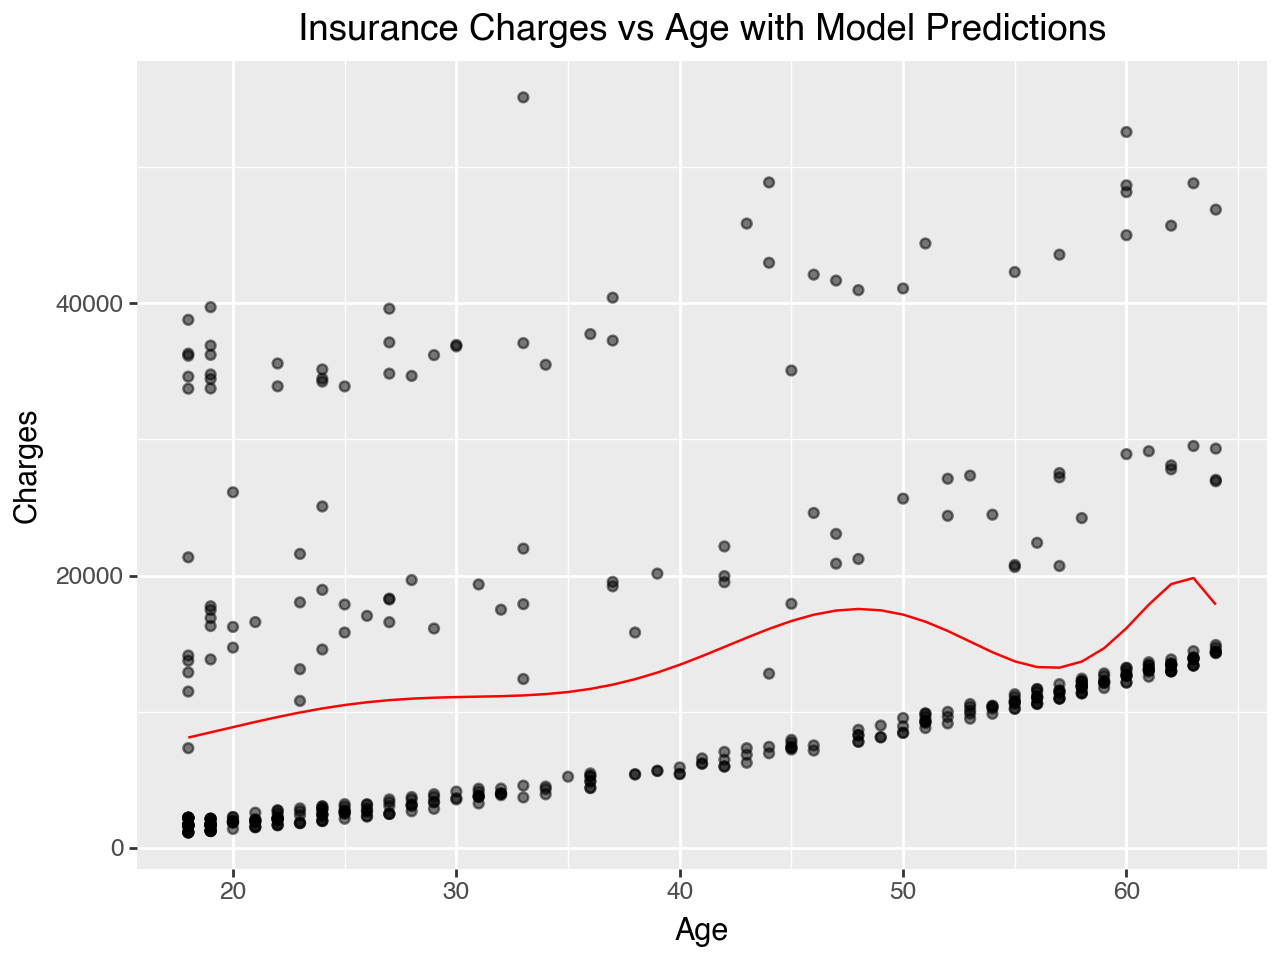

In [192]:

data['predicted_charges'] = lr_fitted.predict(data[['age']])

(
    ggplot(data, aes(x="age", y="charges")) +
    geom_point(color="black", alpha=0.5) +  # Scatter plot for original data
    geom_line(aes(y="predicted_charges"), color="red") +  # Line plot for predictions
    labs(title="Insurance Charges vs Age with Model Predictions",
         x="Age", y="Charges")
)


Part 4

In [193]:
data3 = pd.read_csv("/Users/ethanschultz/Downloads/insurance_costs_2.csv")
data3.head()

,age,sex,bmi,smoker,region,charges
0,23,male,34.400,no,southwest,1826.84300
1,56,male,40.300,no,southwest,10602.38500
2,18,male,34.100,no,southeast,1137.01100
3,63,female,23.085,no,northeast,14451.83515
4,63,male,28.310,no,northwest,13770.09790


In [194]:
X = data.drop("charges", axis = 1)
y = data["charges"]
X_test = data3.drop("charges", axis = 1)
y_test = data3["charges"]

In [195]:
#1
ct = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age"])
  ],
  remainder = "drop"
)


lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

lr_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('standardize',
                                                  StandardScaler(),
                                                  ['age'])])),
                ('linear_regression', LinearRegression())])

In [196]:
lr_fitted = lr_pipeline.fit(X, y)
test_pred = lr_fitted.predict(X_test)
test_mse = mean_squared_error(y_test, test_pred)
test_r2 = r2_score(y_test, test_pred)
intercept = lr_fitted.named_steps['linear_regression'].intercept_
coefficient = lr_fitted.named_steps['linear_regression'].coef_

# printing results
print("Test MSE:", test_mse)
print("Test R^2:", test_r2)
print("intercept:", intercept)
print("coefficients:", coefficient)

Test MSE: 136077136.50195494
Test R^2: 0.12236515675533055
intercept: 12297.098118187932
coefficients: [3739.70080761]
Test MSE: 136077136.50195494
Test R^2: 0.12236515675533055
intercept: 12297.098118187932
coefficients: [3739.70080761]


In [197]:
#2
ct = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age", "bmi"])
  ],
  remainder = "drop"
)


lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

lr_pipeline

lr_fitted = lr_pipeline.fit(X, y)
test_pred = lr_fitted.predict(X_test)
test_mse = mean_squared_error(y_test, test_pred)
test_r2 = r2_score(y_test, test_pred)
intercept = lr_fitted.named_steps['linear_regression'].intercept_
coefficient = lr_fitted.named_steps['linear_regression'].coef_

# printing results
print("Test MSE:", test_mse)
print("Test R^2:", test_r2)
print("intercept:", intercept)
print("coefficients:", coefficient)

Test MSE: 132636406.1108129
Test R^2: 0.14455628272331222
intercept: 12297.098118187932
coefficients: [3535.35939421 1728.75207656]
Test MSE: 132636406.1108129
Test R^2: 0.14455628272331222
intercept: 12297.098118187932
coefficients: [3535.35939421 1728.75207656]


In [198]:
#3
ct = ColumnTransformer(
  [
  ("dummify", OneHotEncoder(sparse_output = False), ["smoker"]),
  ("standardize", StandardScaler(), ["age", "bmi"])
  ],
  remainder = "drop"
)


lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

lr_pipeline

lr_fitted = lr_pipeline.fit(X, y)
test_pred = lr_fitted.predict(X_test)
test_mse = mean_squared_error(y_test, test_pred)
test_r2 = r2_score(y_test, test_pred)
intercept = lr_fitted.named_steps['linear_regression'].intercept_
coefficient = lr_fitted.named_steps['linear_regression'].coef_

# printing results
print("Test MSE:", test_mse)
print("Test R^2:", test_r2)
print("intercept:", intercept)
print("coefficients:", coefficient)

Test MSE: 35383066.1530062
Test R^2: 0.7717955233702082
intercept: 1.8455372989009853e+17
coefficients: [-1.84553730e+17 -1.84553730e+17  3.90895298e+03  1.70923907e+03]
Test MSE: 35383066.1530062
Test R^2: 0.7717955233702082
intercept: 1.8455372989009853e+17
coefficients: [-1.84553730e+17 -1.84553730e+17  3.90895298e+03  1.70923907e+03]


In [214]:
#4
# Preprocess age and bmi, and one-hot encode smoker
ct = ColumnTransformer(
    [
        ("dummify", OneHotEncoder(drop="if_binary", sparse_output=False), ["smoker"]),
        ("standardize", StandardScaler(), ["age", "bmi"])
    ],
    remainder="drop"
).set_output(transform="pandas")

# Generate interaction terms only, without including smoker directly
ct_inter = ColumnTransformer(
    [
        ("interaction_age", PolynomialFeatures(degree=2, interaction_only=True, include_bias=False), 
         ["dummify__smoker_yes", "standardize__age"]),
        ("interaction_bmi", PolynomialFeatures(degree=2, interaction_only=True, include_bias=False), 
         ["dummify__smoker_yes", "standardize__bmi"])
    ],
    remainder="drop"
).set_output(transform="pandas")

# Define the pipeline
lr_pipeline = Pipeline(
    [
        ("preprocessing", ct),
        ("interactions", ct_inter),
        ("linear_regression", LinearRegression())
    ]
)

# Fit the model
lr_fitted = lr_pipeline.fit(X, y)

# Predict on the test set
test_pred = lr_fitted.predict(X_test)

# Calculate and print performance metrics
test_mse = mean_squared_error(y_test, test_pred)
test_r2 = r2_score(y_test, test_pred)
intercept = lr_fitted.named_steps['linear_regression'].intercept_
coefficient = lr_fitted.named_steps['linear_regression'].coef_

print("Test MSE:", test_mse)
print("Test R^2:", test_r2)
print("Intercept:", intercept)
print("Coefficients:", coefficient)


Test MSE: 21477236.234406777
Test R^2: 0.8614817202914794
Intercept: 7298.458868064472
Coefficients: [ 1.15036049e+17  4.22400000e+03 -2.87740171e+02 -1.15036049e+17
  3.22637268e+01  9.00365340e+03]
Test MSE: 21477236.234406777
Test R^2: 0.8614817202914794
Intercept: 7298.458868064472
Coefficients: [ 1.15036049e+17  4.22400000e+03 -2.87740171e+02 -1.15036049e+17
  3.22637268e+01  9.00365340e+03]


In [215]:
#5
ct = ColumnTransformer(
    [
        ("dummify", OneHotEncoder(sparse_output=False), ["smoker"]),
        ("standardize", StandardScaler(), ["age", "bmi"])
    ],
    remainder="drop"
).set_output(transform="pandas")

ct_inter = ColumnTransformer(
    [
        ("interaction_age", PolynomialFeatures(interaction_only=True), ["dummify__smoker_yes", "standardize__age"]),
        ("interaction_bmi", PolynomialFeatures(interaction_only=True), ["dummify__smoker_yes", "standardize__bmi"])
    ],
    remainder="drop"
).set_output(transform="pandas")

lr_pipeline = Pipeline(
    [
        ("preprocessing", ct),
        ("interactions", ct_inter),
        ("linear_regression", LinearRegression())
    ]
)

lr_fitted = lr_pipeline.fit(X, y)
test_pred = lr_fitted.predict(X_test)

test_mse = mean_squared_error(y_test, test_pred)
test_r2 = r2_score(y_test, test_pred)

intercept = lr_fitted.named_steps['linear_regression'].intercept_
coefficient = lr_fitted.named_steps['linear_regression'].coef_

# Printing results
print("Test MSE:", test_mse)
print("Test R^2:", test_r2)
print("Intercept:", intercept)
print("Coefficients:", coefficient)

Test MSE: 21123715.72618283
Test R^2: 0.8637617647118325
Intercept: 654788679237199.8
Coefficients: [ 0.00000000e+00  3.82653512e+17  4.30144422e+03 -2.31722055e+02
 -6.54788679e+14 -3.82653512e+17  7.50955082e+01  9.05361366e+03]
Test MSE: 21123715.72618283
Test R^2: 0.8637617647118325
Intercept: 654788679237199.8
Coefficients: [ 0.00000000e+00  3.82653512e+17  4.30144422e+03 -2.31722055e+02
 -6.54788679e+14 -3.82653512e+17  7.50955082e+01  9.05361366e+03]


If we go through all the R^2 and the MSE values for these 5 models the one with the highest R^2 and lowest MSE is model 5 that included age, bmi, smoker, and also the interactions between smoker and age and smoker and bmi. This model had an R^2 of 0.8637 which was higher than any other model and an MSE of 21123715 which was lower than any other model.

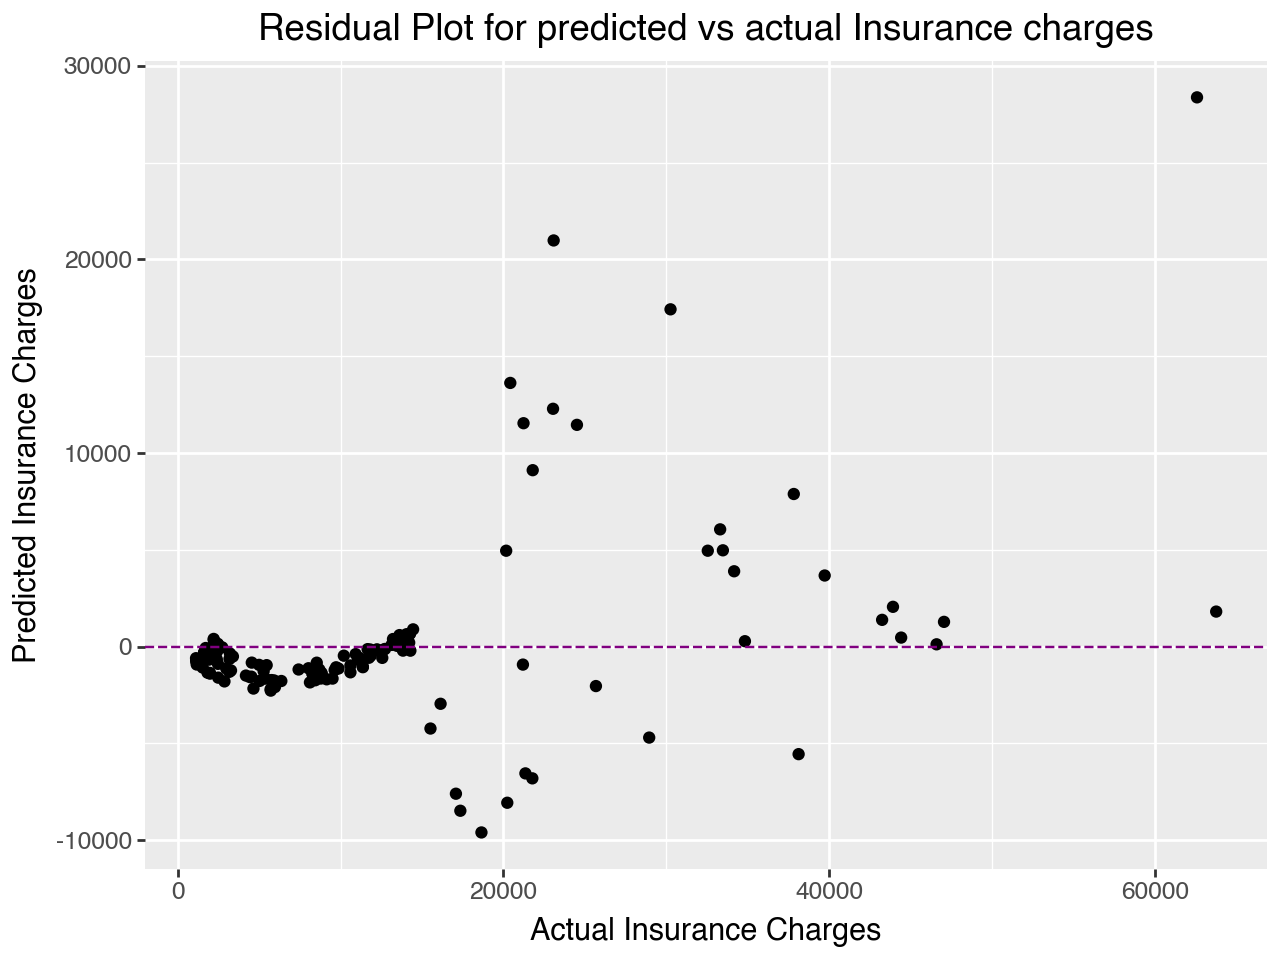

In [227]:
residuals = y_test - test_pred
data3['residuals'] = residuals

(ggplot(data3, aes(x='charges', y = 'residuals'))
  +geom_point()
  +geom_hline(yintercept=0, color="purple", linetype="dashed") +
    labs(title = "Residual Plot for predicted vs actual Insurance charges",
            x= "Actual Insurance Charges",
            y="Predicted Insurance Charges"))

Part 5

In [247]:

ct = ColumnTransformer(
    [
        ("dummify", OneHotEncoder(sparse_output=False), ["smoker", "sex"]),
        ("standardize", StandardScaler(), ["age", "bmi"])
    ],
    remainder="drop"
).set_output(transform="pandas")

ct_inter = ColumnTransformer(
    [
        ("interaction_age", PolynomialFeatures(interaction_only=True), ["dummify__smoker_yes", "standardize__age"])
    ],
    remainder="drop"
).set_output(transform="pandas")

lr_pipeline = Pipeline(
    [
        ("preprocessing", ct),
        ("interactions", ct_inter),
        ("linear_regression", LinearRegression())
    ]
)

lr_fitted = lr_pipeline.fit(X, y)
test_pred = lr_fitted.predict(X_test)

test_mse = mean_squared_error(y_test, test_pred)
test_r2 = r2_score(y_test, test_pred)

intercept = lr_fitted.named_steps['linear_regression'].intercept_
coefficient = lr_fitted.named_steps['linear_regression'].coef_

# Printing results
print("Test MSE:", test_mse)
print("Test R^2:", test_r2)

Test MSE: 38757968.35496921
Test R^2: 0.7500289588970989
Test MSE: 38757968.35496921
Test R^2: 0.7500289588970989


In [252]:

# Step 1: Standardize age and bmi, and one-hot encode smoker
ct = ColumnTransformer(
    [
        ("dummify", OneHotEncoder(drop="if_binary", sparse_output=False), ["smoker"]),
        ("standardize", StandardScaler(), ["age", "bmi"])
    ],
    remainder="drop"
).set_output(transform="pandas")

# Step 2: Create polynomial and interaction terms
ct_inter = ColumnTransformer(
    [
        ("polynomial_interactions", PolynomialFeatures(degree=5, include_bias=False), 
         ["dummify__smoker_yes", "standardize__age", "standardize__bmi"])
    ],
    remainder="drop"
).set_output(transform="pandas")

# Define the pipeline
lr_pipeline = Pipeline(
    [
        ("preprocessing", ct),
        ("interactions", ct_inter),
        ("linear_regression", LinearRegression())
    ]
)

# Fit the model
lr_fitted = lr_pipeline.fit(X, y)

# Predict on the test set
test_pred = lr_fitted.predict(X_test)

# Calculate and print performance metrics
test_mse = mean_squared_error(y_test, test_pred)
test_r2 = r2_score(y_test, test_pred)
intercept = lr_fitted.named_steps['linear_regression'].intercept_
coefficient = lr_fitted.named_steps['linear_regression'].coef_

print("Test MSE:", test_mse)
print("Test R^2:", test_r2)

Test MSE: 27771985.07245685
Test R^2: 0.8208834901129125
Test MSE: 27771985.07245685
Test R^2: 0.8208834901129125


In [256]:

# Step 1: Standardize age and bmi, and one-hot encode smoker
ct = ColumnTransformer(
    [
        ("dummify", OneHotEncoder(drop="if_binary", sparse_output=False), ["smoker"]),
        ("standardize", StandardScaler(), ["age", "bmi"])
    ],
    remainder="drop"
).set_output(transform="pandas")

# Step 2: Create individual polynomial terms for age and bmi (degree 4), 
# as well as interaction terms with smoker_yes and age-bmi interaction.
ct_inter = ColumnTransformer(
    [
        # Polynomial terms for age and bmi up to degree 4
        ("polynomial_age", PolynomialFeatures(degree=4, include_bias=False), ["standardize__age"]),
        ("polynomial_bmi", PolynomialFeatures(degree=4, include_bias=False), ["standardize__bmi"]),
        
        # Interaction terms: smoker_yes with age and bmi, and age with bmi
        ("interaction_smoker_age", PolynomialFeatures(degree=2, include_bias=False, interaction_only=True), 
         ["dummify__smoker_yes", "standardize__age"]),
        ("interaction_smoker_bmi", PolynomialFeatures(degree=2, include_bias=False, interaction_only=True), 
         ["dummify__smoker_yes", "standardize__bmi"]),
        ("interaction_age_bmi", PolynomialFeatures(degree=2, include_bias=False, interaction_only=True), 
         ["standardize__age", "standardize__bmi"])
    ],
    remainder="drop"
).set_output(transform="pandas")

# Define the pipeline
lr_pipeline = Pipeline(
    [
        ("preprocessing", ct),
        ("interactions", ct_inter),
        ("linear_regression", LinearRegression())
    ]
)

# Fit the model
lr_fitted = lr_pipeline.fit(X, y)

# Predict on the test set
test_pred = lr_fitted.predict(X_test)

# Calculate and print performance metrics
test_mse = mean_squared_error(y_test, test_pred)
test_r2 = r2_score(y_test, test_pred)
intercept = lr_fitted.named_steps['linear_regression'].intercept_
coefficient = lr_fitted.named_steps['linear_regression'].coef_

print("Test MSE:", test_mse)
print("Test R^2:", test_r2)

Test MSE: 22556997.534809683
Test R^2: 0.8545177573217917
Test MSE: 22556997.534809683
Test R^2: 0.8545177573217917


In [255]:

# Step 1: Standardize age and bmi, and one-hot encode smoker
ct = ColumnTransformer(
    [
        ("dummify", OneHotEncoder(drop="if_binary", sparse_output=False), ["smoker"]),
        ("standardize", StandardScaler(), ["age", "bmi"])
    ],
    remainder="drop"
).set_output(transform="pandas")

# Step 2: Create polynomial and interaction terms (using degree 3)
ct_inter = ColumnTransformer(
    [
        ("polynomial_interactions", PolynomialFeatures(degree=3, include_bias=False), 
         ["dummify__smoker_yes", "standardize__age", "standardize__bmi"])
    ],
    remainder="drop"
).set_output(transform="pandas")

# Define the pipeline
lr_pipeline = Pipeline(
    [
        ("preprocessing", ct),
        ("interactions", ct_inter),
        ("linear_regression", LinearRegression())
    ]
)

# Fit the model
lr_fitted = lr_pipeline.fit(X, y)

# Predict on the test set
test_pred = lr_fitted.predict(X_test)

# Calculate and print performance metrics
test_mse = mean_squared_error(y_test, test_pred)
test_r2 = r2_score(y_test, test_pred)
intercept = lr_fitted.named_steps['linear_regression'].intercept_
coefficient = lr_fitted.named_steps['linear_regression'].coef_

print("Test MSE:", test_mse)
print("Test R^2:", test_r2)

Test MSE: 22068594.865151517
Test R^2: 0.8576677295466963
Test MSE: 22068594.865151517
Test R^2: 0.8576677295466963


From these four more models exploring different variations of predictors the third model we created was best it had an R^2 of 0.8576 and an MSE of 22068594. This model includes age, smoker, and bmi along with the interaction between smoker and age and smoker and bmi, and also includes a polynomial degree of 3. This model although close still does not fit better tha the best model from part 4 indicating that we are over complicating the model and running into an overfitting issue.

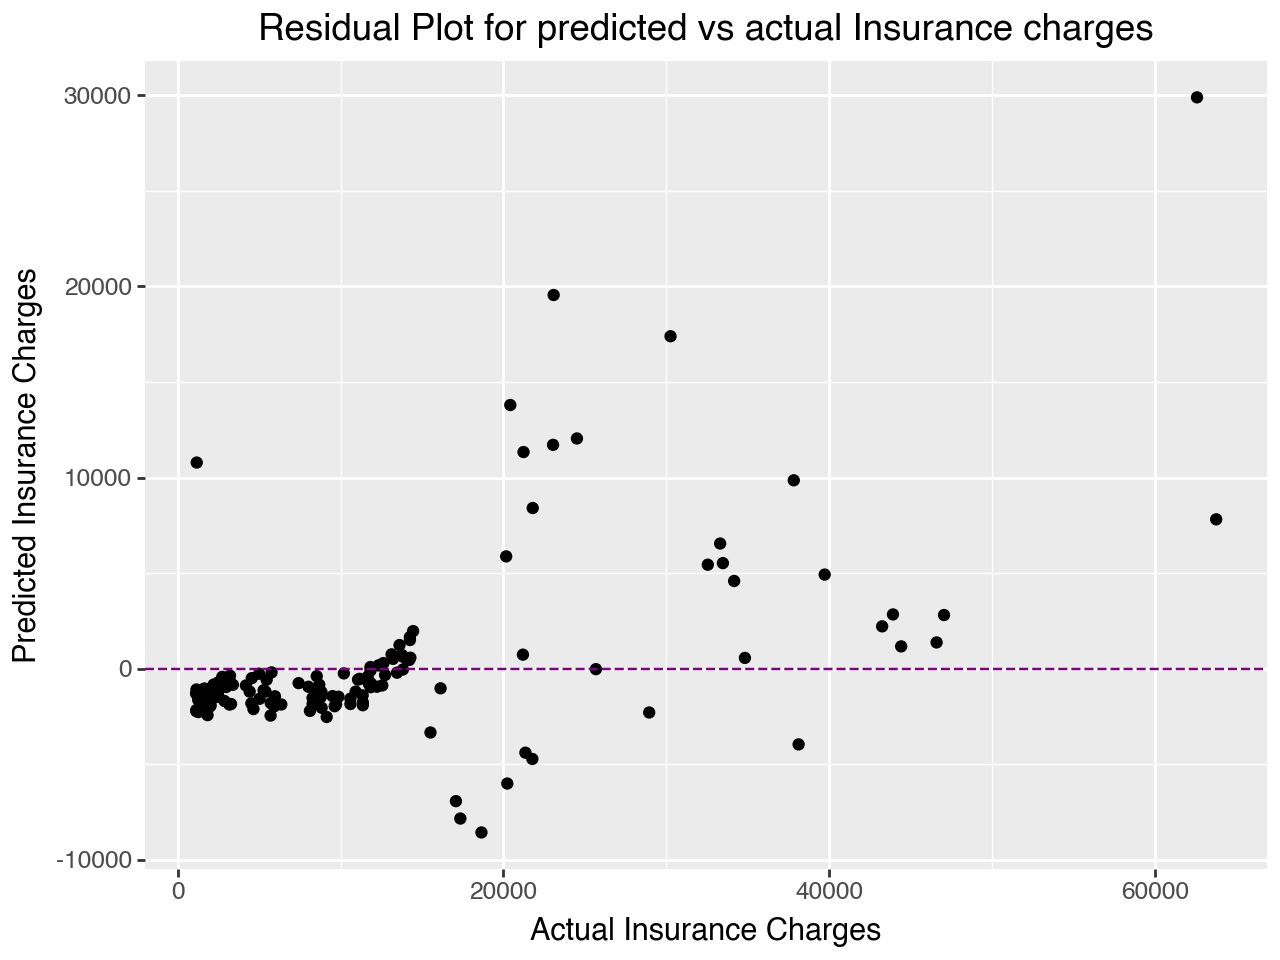

In [257]:
residuals = y_test - test_pred
data3['residuals'] = residuals

(ggplot(data3, aes(x='charges', y = 'residuals'))
  +geom_point()
  +geom_hline(yintercept=0, color="purple", linetype="dashed") +
    labs(title = "Residual Plot for predicted vs actual Insurance charges",
            x= "Actual Insurance Charges",
            y="Predicted Insurance Charges"))

Even though the R^2 and mse are lower and higher respectively the bunched up curve of predicted vs fitted values seems closer to that line at 0 which makes me believe that this model might be better. Although they are still super similar but that is one observation I took.